In [1]:
import pandas as pd
import pickle
with open('world_cup_tweets_jp.pkl', 'rb') as f:
    df = pickle.load(f)

In [2]:
df.head()

,Date,Id,User,Tweet_processed
0,2022-12-19 03:59:59+00:00,1604687965913255938,_ne_gi_to_ro_,これぐらいのメンタルがないとワールドカップで優勝なんてできないってことでしょ
1,2022-12-19 03:59:55+00:00,1604687948191891458,AstroZombie5,昨日は鎌倉殿の最終回にM-1決勝ワールドカップ決勝っていう盆と正月状態のすごい日曜日だった全...
2,2022-12-19 03:59:53+00:00,1604687939656507392,ma_love_o,ワールドカップ見て色んな国の背番号9はイケメンって言われてて私のTikTokに流れてくる動画...
3,2022-12-19 03:59:51+00:00,1604687934611156992,BitchGoldLabel,かっカンドーしたFIFAワールドカップ普段サッカー見ないのにスポーツってカンドーするね寝不足...
4,2022-12-19 03:59:51+00:00,1604687934057508864,LwFxvhggouwYjkL,実は学生時代サッカーやってたのでワールドカップの決勝は激アツだったバロンドール7回受賞してる...


In [3]:
texts=df['Tweet_processed']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import MeCab

def tokenize_jp(text):
    
    # Read stopwords from file
    with open('stopwords-ja.txt', encoding='utf-8') as f:
        stopwords = set(f.read().split())
    
    words = MeCab.Tagger("-Owakati").parse(text).split()
    
    # Remove stopwords from words
    words = [w for w in words if w not in stopwords]
    
    return words

vectorizer = CountVectorizer(tokenizer=tokenize_jp)

In [5]:
from bertopic import BERTopic
topic_model = BERTopic(language="japanese", calculate_probabilities=True, verbose=True, vectorizer_model=vectorizer)
topics, probs = topic_model.fit_transform(texts)

/Users/danmengcai/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 313/313 [05:14<00:00,  1.00s/it]
2023-04-09 21:39:04,997 - BERTopic - Transformed documents to Embeddings
2023-04-09 21:39:38,412 - BERTopic - Reduced dimensionality
2023-04-09 21:39:43,468 - BERTopic - Clustered reduced embeddings


In [6]:
freq = topic_model.get_topic_info(); freq.head(20)

,Topic,Count,Name
0,-1,3484,-1_ワールド_カップ_見_決勝
1,0,1991,0_アルゼンチン_優勝_フランス_めでとう
2,1,259,1_m_-_1_グランプリ
3,2,232,2_日本_代表_人_けど
4,3,210,3_位_9_日本_順位
5,4,209,4_終わっ_終わり_寂しい_カップ
6,5,190,5_おはよう_ござい_vtuber_今日
7,6,151,6_ありがとう_感動_#_めでとう
8,7,133,7_寒い_雪_寒_雪かき
9,8,131,8_年_4_後_４


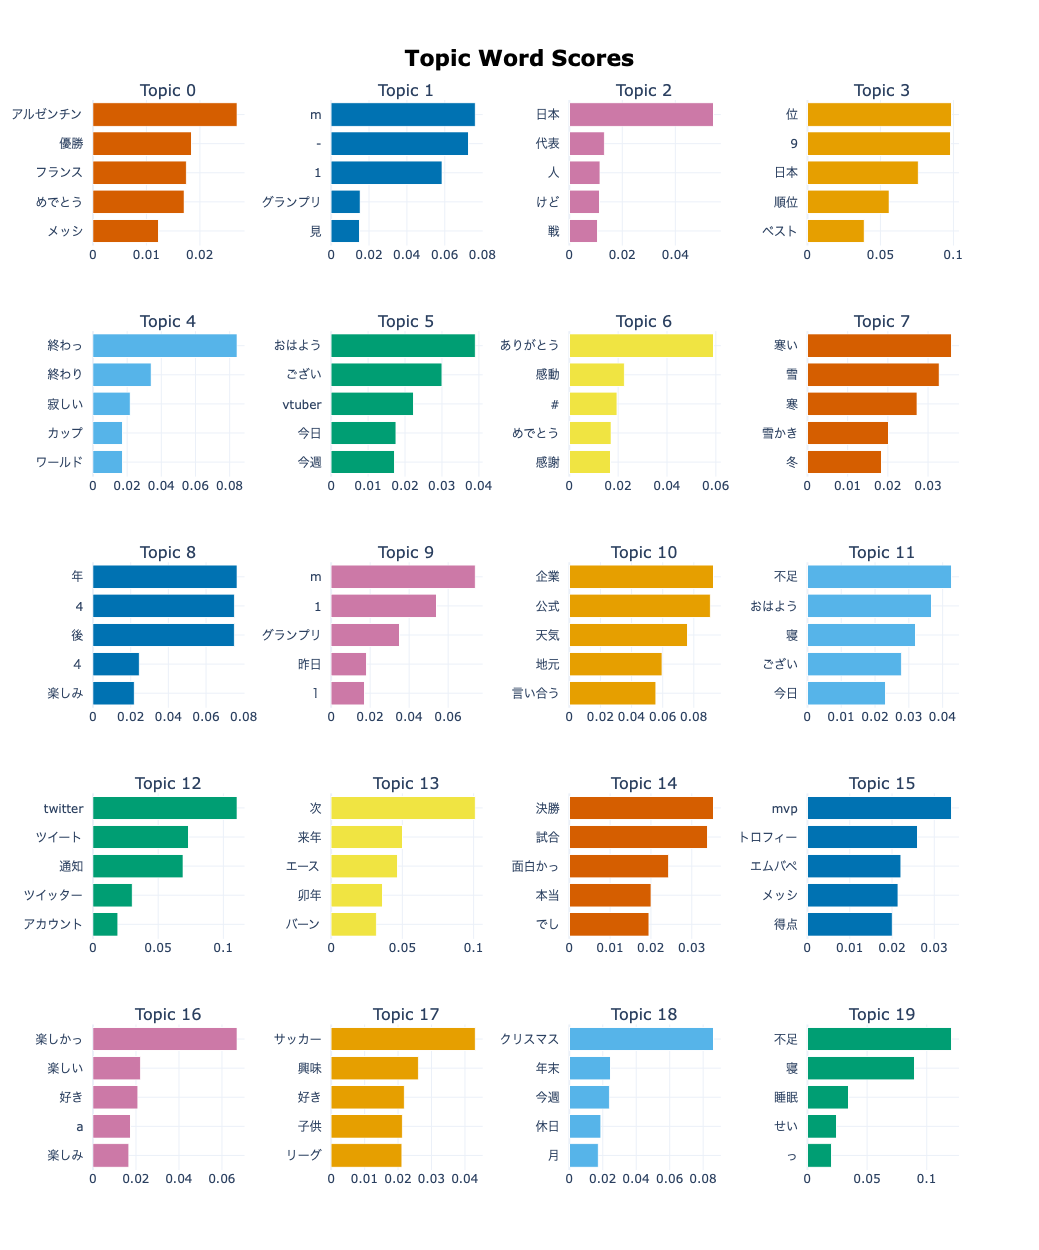

In [8]:
topic_model.visualize_barchart(top_n_topics=20)

In [33]:
# Tokenize each text in `texts` using `tokenize_jp` function
tokenized_texts = [tokenize_jp(text) for text in texts]

AttributeError: 'str' object has no attribute 'feature'

In [13]:
tagger = MeCab.Tagger("-r/dev/null -Owakati")
tagger.parse("")#バグ回避 

result = tagger.parse("今日の天気は晴れである。It is sunny today.")
print(result)

RuntimeError: 
----------------------------------------------------------

Failed initializing MeCab. Please see the README for possible solutions:

    https://github.com/SamuraiT/mecab-python3#common-issues

If you are still having trouble, please file an issue here, and include the
ERROR DETAILS below:

    https://github.com/SamuraiT/mecab-python3/issues

issueを英語で書く必要はありません。

------------------- ERROR DETAILS ------------------------
arguments: -r/dev/null -Owakati
[ifs] no such file or directory: /Users/danmengcai/opt/anaconda3/envs/newPy/lib/python3.8/site-packages/unidic/dicdir/dicrc
----------------------------------------------------------


In [29]:
def tokenize_jp(text):
    
    node = MeCab.Tagger("/Users/danmengcai/opt/anaconda3/envs/newPy/lib/python3.8/site-packages/unidic_lite").parse(text)
    print("node:", node)
    
    word_list = []
    while node: 
        pos = node.feature.split(",")[0]
        print("pos:", pos)
        
        if pos in ["名詞", "動詞", "形容詞"]:  
            word = node.surface
            word_list.append(word)
        
        node = node.next
    return " ".join(word_list)

In [30]:
# Tokenize each text in `texts` using `tokenize_jp` function
tokenized_texts = [tokenize_jp(text) for text in texts]

node: これ	コレ	コレ	此れ	代名詞			0
ぐらい	グライ	クライ	くらい	助詞-副助詞			
の	ノ	ノ	の	助詞-格助詞			
メンタル	メンタル	メンタル	メンタル-mental 	形状詞-一般			1
が	ガ	ガ	が	助詞-格助詞			
ない	ナイ	ナイ	無い	形容詞-非自立可能	形容詞	終止形-一般	1
と	ト	ト	と	助詞-接続助詞			
ワールド	ワールド	ワールド	ワールド-world	名詞-普通名詞-一般			1
カップ	カップ	カップ	カップ-cup	名詞-普通名詞-一般			1
で	デ	デ	で	助詞-格助詞			
優勝	ユーショー	ユウショウ	優勝	名詞-普通名詞-サ変可能			0
なんて	ナンテ	ナンテ	なんて	助詞-副助詞			
でき	デキ	デキル	出来る	動詞-非自立可能	上一段-カ行	未然形-一般	2
ない	ナイ	ナイ	ない	助動詞	助動詞-ナイ	終止形-一般	
って	ッテ	ッテ	って	助詞-副助詞			
こと	コト	コト	事	名詞-普通名詞-一般			2
でしょ	デショ	デス	です	助動詞	助動詞-デス	意志推量形	
EOS



AttributeError: 'str' object has no attribute 'feature'